In [1]:
import pandas as pd
import numpy as np

In [2]:
grade=pd.read_csv(r"C:\Users\hp\Downloads\archive (9)\Grades.csv")

In [3]:
grade.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

In [4]:
grade.describe()

CGPA
count  571.000000
mean     2.954888
std      0.620552
min      0.800000
25%      2.538000
50%      3.029000
75%      3.451000
max      3.985000

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

In [7]:
grade.shape

(571, 43)

In [8]:
grade.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [10]:
grade.head(2)

Seat No. PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-      C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+      D     B-      C      D      A     D+   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  

[2 rows x 43 columns]

In [12]:
                                                 #Checking for missing values
grade.isnull().mean()*100

Seat No.     0.000000
PH-121       0.000000
HS-101       0.000000
CY-105       0.175131
HS-105       0.175131
MT-111       0.350263
CS-105       0.000000
CS-106       0.350263
EL-102       0.350263
EE-119       0.350263
ME-107       0.350263
CS-107       0.350263
HS-205       0.875657
MT-222       0.875657
EE-222       1.225919
MT-224       1.225919
CS-210       1.225919
CS-211       0.875657
CS-203       0.875657
CS-214       1.050788
EE-217       1.050788
CS-212       1.050788
CS-215       1.050788
MT-331       1.576182
EF-303       1.751313
HS-304       1.751313
CS-301       1.751313
CS-302       1.751313
TC-383       1.751313
MT-442       1.751313
EL-332       1.576182
CS-318       1.576182
CS-306       1.576182
CS-312       1.751313
CS-317       2.101576
CS-403       2.101576
CS-421       2.101576
CS-406      14.886165
CS-414       2.276708
CS-419       2.276708
CS-423       2.451839
CS-412      13.835377
CGPA         0.000000
dtype: float64

In [13]:
grade.drop(columns=['Seat No.'],inplace=True)

In [14]:
grade.head()

PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  ...  \
0     B-     D+     C-      C     C-     D+      D     C-     B-     C-  ...   
1      A      D     D+      D     B-      C      D      A     D+      D  ...   
2      A      B      A     B-     B+      A     B-     B+     A-     A-  ...   
3      D     C+     D+      D      D     A-     D+     C-      D     C+  ...   
4     A-     A-     A-     B+      A      A     A-     B+      A     A-  ...   

  CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1     D+      D      C      D     A-     B-      C      C      B  2.008  
2      B      B      A      C      A      A      A     A-      A  3.608  
3     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [15]:
grade_i = grade.apply(lambda x: x.fillna(x.value_counts().index[0]))         #filling the missing value

In [16]:
grade_i.isnull().sum()                          #there are no missing values.

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

In [17]:
grade_i.reset_index(drop=True,inplace=True)

In [18]:
grade_i.head()

PH-121 HS-101 CY-105 HS-105 MT-111 CS-105 CS-106 EL-102 EE-119 ME-107  ...  \
0     B-     D+     C-      C     C-     D+      D     C-     B-     C-  ...   
1      A      D     D+      D     B-      C      D      A     D+      D  ...   
2      A      B      A     B-     B+      A     B-     B+     A-     A-  ...   
3      D     C+     D+      D      D     A-     D+     C-      D     C+  ...   
4     A-     A-     A-     B+      A      A     A-     B+      A     A-  ...   

  CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1     D+      D      C      D     A-     B-      C      C      B  2.008  
2      B      B      A      C      A      A      A     A-      A  3.608  
3     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 42 columns]

In [19]:
for column in grade_i.columns:
    
    grade_i[column]=grade_i[column].replace('A+',4.0)
    grade_i[column]=grade_i[column].replace('A',4.0)
    grade_i[column]=grade_i[column].replace('A-',3.7)
    grade_i[column]=grade_i[column].replace('B+',3.4)
    grade_i[column]=grade_i[column].replace('B',3.0)
    grade_i[column]=grade_i[column].replace('B-',2.7)
    grade_i[column]=grade_i[column].replace('C+',2.4)
    grade_i[column]=grade_i[column].replace('C',2.0)
    grade_i[column]=grade_i[column].replace('C-',1.7)
    grade_i[column]=grade_i[column].replace('D+',1.4)
    grade_i[column]=grade_i[column].replace('D',1.0)
    grade_i[column]=grade_i[column].replace('F',0.0)

In [20]:
grade_i.head(2)

PH-121  HS-101 CY-105 HS-105 MT-111  CS-105 CS-106 EL-102 EE-119 ME-107  \
0    2.7     1.4    1.7    2.0    1.7     1.4    1.0    1.7    2.7    1.7   
1    4.0     1.0    1.4    1.0    2.7     2.0    1.0    4.0    1.4    1.0   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...    1.7    1.7    1.7    1.7    3.7    4.0    1.7    3.0    3.7  2.205  
1  ...    1.4    1.0    2.0    1.0    3.7    2.7    2.0    2.0    3.0  2.008  

[2 rows x 42 columns]

In [21]:
grade_i.corr()                    #checking for coorelation between features

C:\Users\hp\AppData\Local\Temp\ipykernel_8756\2806683756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grade_i.corr()                    #checking for coorelation between features


HS-101    CS-105    MT-331    CS-301    CS-302    TC-383    MT-442  \
HS-101  1.000000  0.432621  0.151900  0.310643  0.373809  0.344223  0.254436   
CS-105  0.432621  1.000000  0.230586  0.244551  0.450468  0.208635  0.446805   
MT-331  0.151900  0.230586  1.000000  0.529686  0.403378  0.433798  0.320140   
CS-301  0.310643  0.244551  0.529686  1.000000  0.594196  0.647684  0.442251   
CS-302  0.373809  0.450468  0.403378  0.594196  1.000000  0.508711  0.533834   
TC-383  0.344223  0.208635  0.433798  0.647684  0.508711  1.000000  0.301546   
MT-442  0.254436  0.446805  0.320140  0.442251  0.533834  0.301546  1.000000   
CS-317  0.409697  0.397065  0.480862  0.663958  0.650783  0.579772  0.518189   
CS-403  0.243646  0.268677  0.463075  0.612552  0.438038  0.538570  0.335705   
CS-419  0.283499  0.317141  0.466236  0.632891  0.539169  0.503410  0.432858   
CS-423  0.240377  0.044027  0.331304  0.600443  0.459356  0.549923  0.289501   
CGPA    0.562432  0.627746  0.514984  0.698290  0.704748  0.598895  0.582635   

          CS-317    CS-403    CS-419    CS-423      CGPA  
HS-101  0.409697  0.243646  0.283499  0.240377  0.562432  
CS-105  0.397065  0.268677  0.317141  0.044027  0.627746  
MT-331  0.480862  0.463075  0.466236  0.331304  0.514984  
CS-301  0.663958  0.612552  0.632891  0.600443  0.698290  
CS-302  0.650783  0.438038  0.539169  0.459356  0.704748  
TC-383  0.579772  0.538570  0.503410  0.549923  0.598895  
MT-442  0.518189  0.335705  0.432858  0.289501  0.582635  
CS-317  1.000000  0.529344  0.630607  0.557037  0.785866  
CS-403  0.529344  1.000000  0.628865  0.348681  0.560895  
CS-419  0.630607  0.628865  1.000000  0.479060  0.653644  
CS-423  0.557037  0.348681  0.479060  1.000000  0.523046  
CGPA    0.785866  0.560895  0.653644  0.523046  1.000000

C:\Users\hp\AppData\Local\Temp\ipykernel_8756\4241160582.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(grade_i.corr(),annot=True, cmap='YlGnBu')


<Axes: >

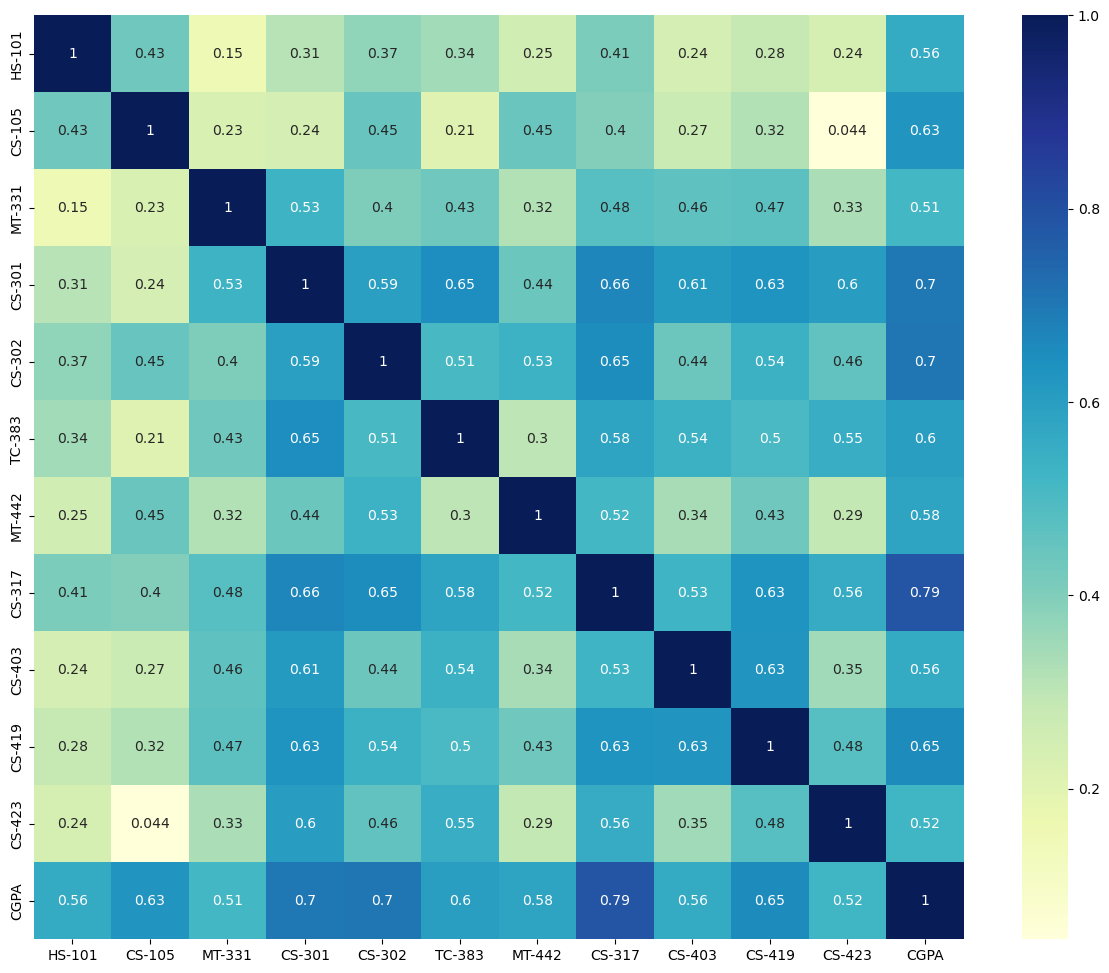

In [22]:
plt.figure(figsize=[15,12])
sns.heatmap(grade_i.corr(),annot=True, cmap='YlGnBu')

In [23]:
grade_i['HS-101'].value_counts()

3.7    82
2.7    78
2.0    68
3.0    63
3.4    59
1.7    50
2.4    47
1.0    45
4.0    42
1.4    36
0.0     1
Name: HS-101, dtype: int64

In [24]:
grade_i.dtypes

PH-121     object
HS-101    float64
CY-105     object
HS-105     object
MT-111     object
CS-105    float64
CS-106     object
EL-102     object
EE-119     object
ME-107     object
CS-107     object
HS-205     object
MT-222     object
EE-222     object
MT-224     object
CS-210     object
CS-211     object
CS-203     object
CS-214     object
EE-217     object
CS-212     object
CS-215     object
MT-331    float64
EF-303     object
HS-304     object
CS-301    float64
CS-302    float64
TC-383    float64
MT-442    float64
EL-332     object
CS-318     object
CS-306     object
CS-312     object
CS-317    float64
CS-403    float64
CS-421     object
CS-406     object
CS-414     object
CS-419    float64
CS-423    float64
CS-412     object
CGPA      float64
dtype: object

<Figure size 5000x3500 with 0 Axes>

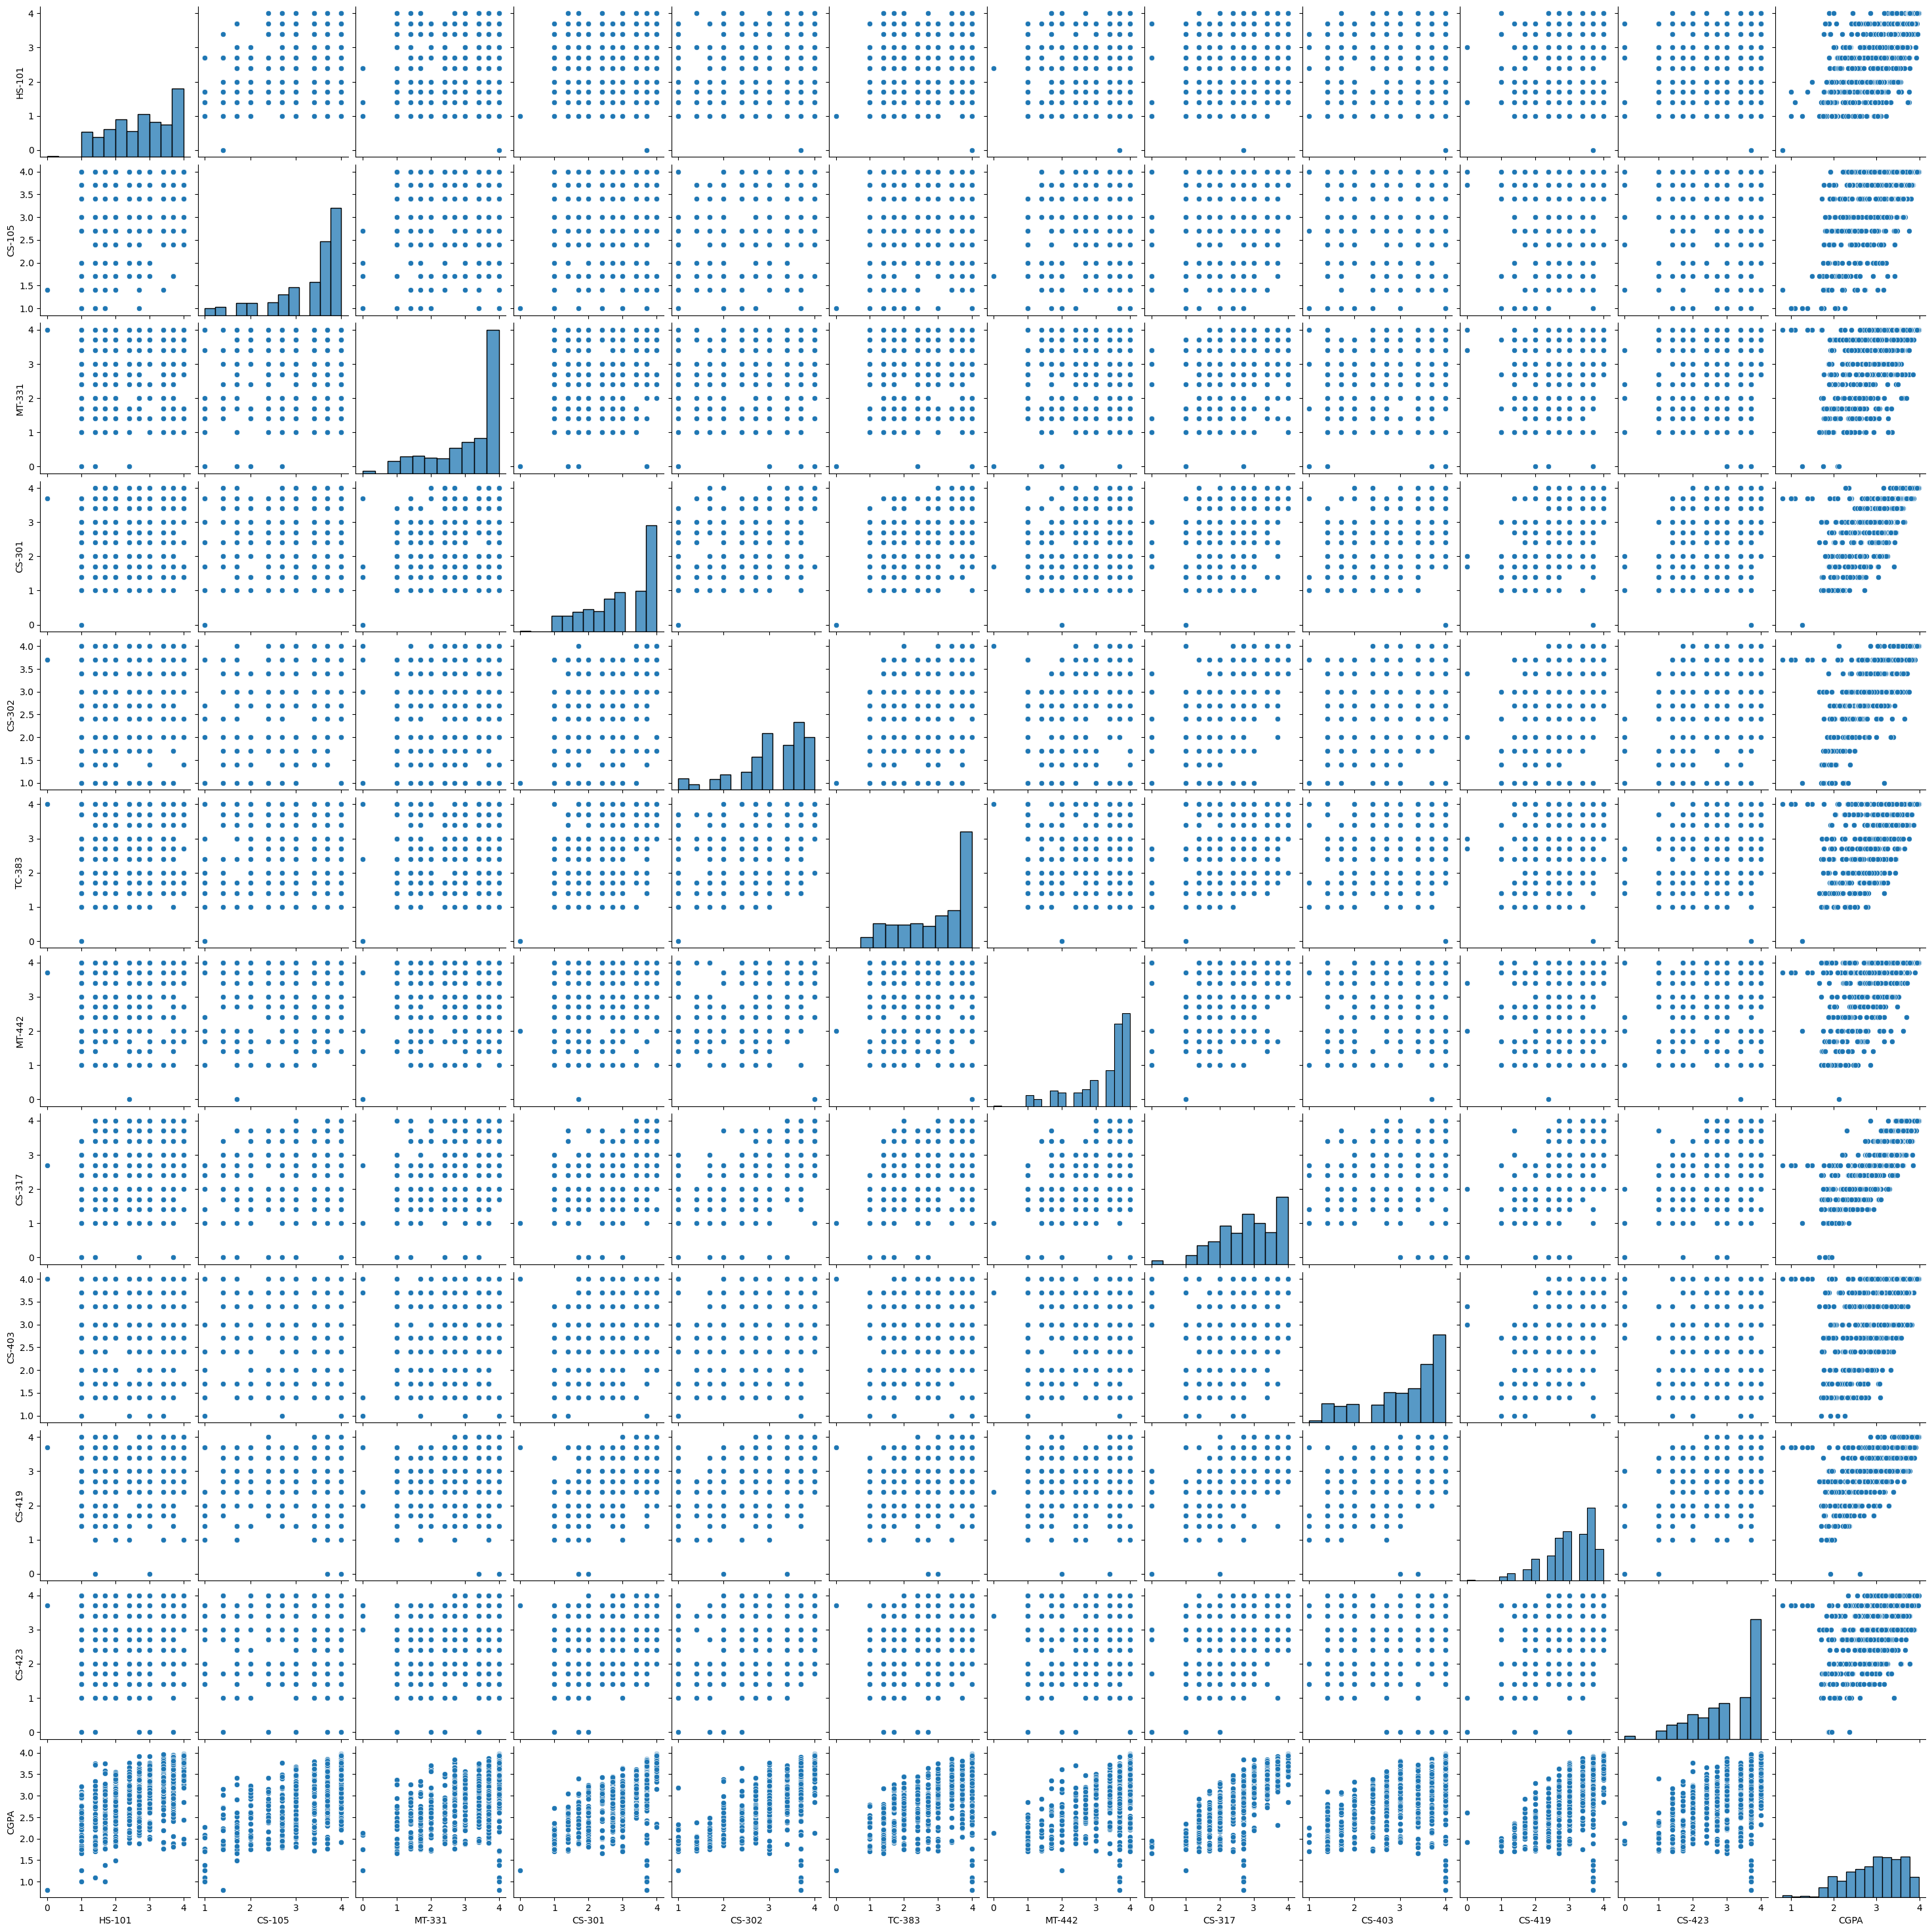

In [25]:
# Different distribution patterns of features
plt.figure(figsize=[50,35])
sns.pairplot(grade_i)

In [26]:
grade_i['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [27]:
grade_i['CGPA'].max()

3.985

In [28]:
grade_i['CGPA'].min()

0.8

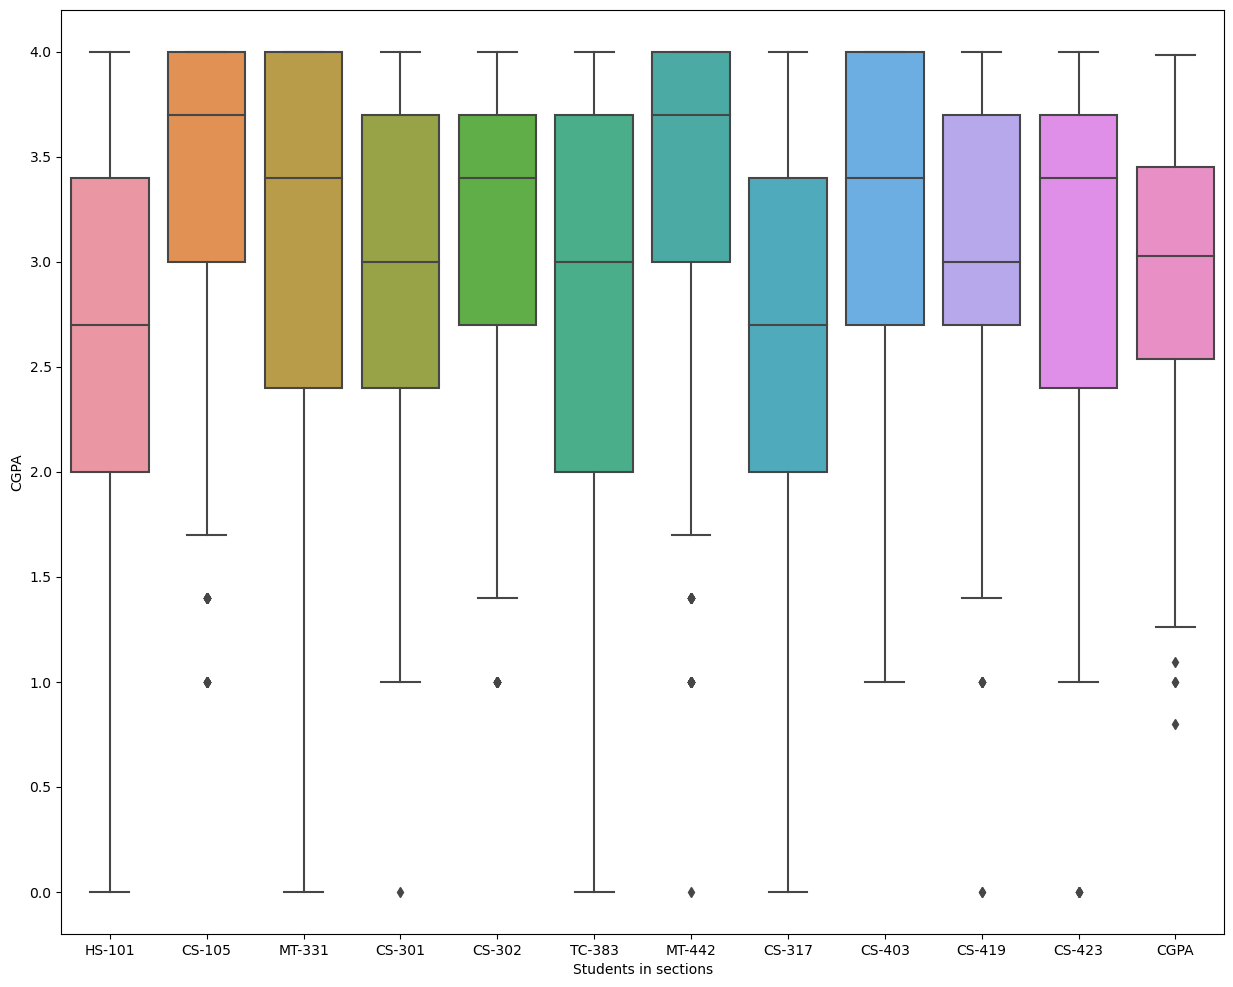

In [29]:

plt.figure(figsize=[15,12])
sns.boxplot(data=grade_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')                                # Clearly can be seen that dataset has outliers
plt.show()



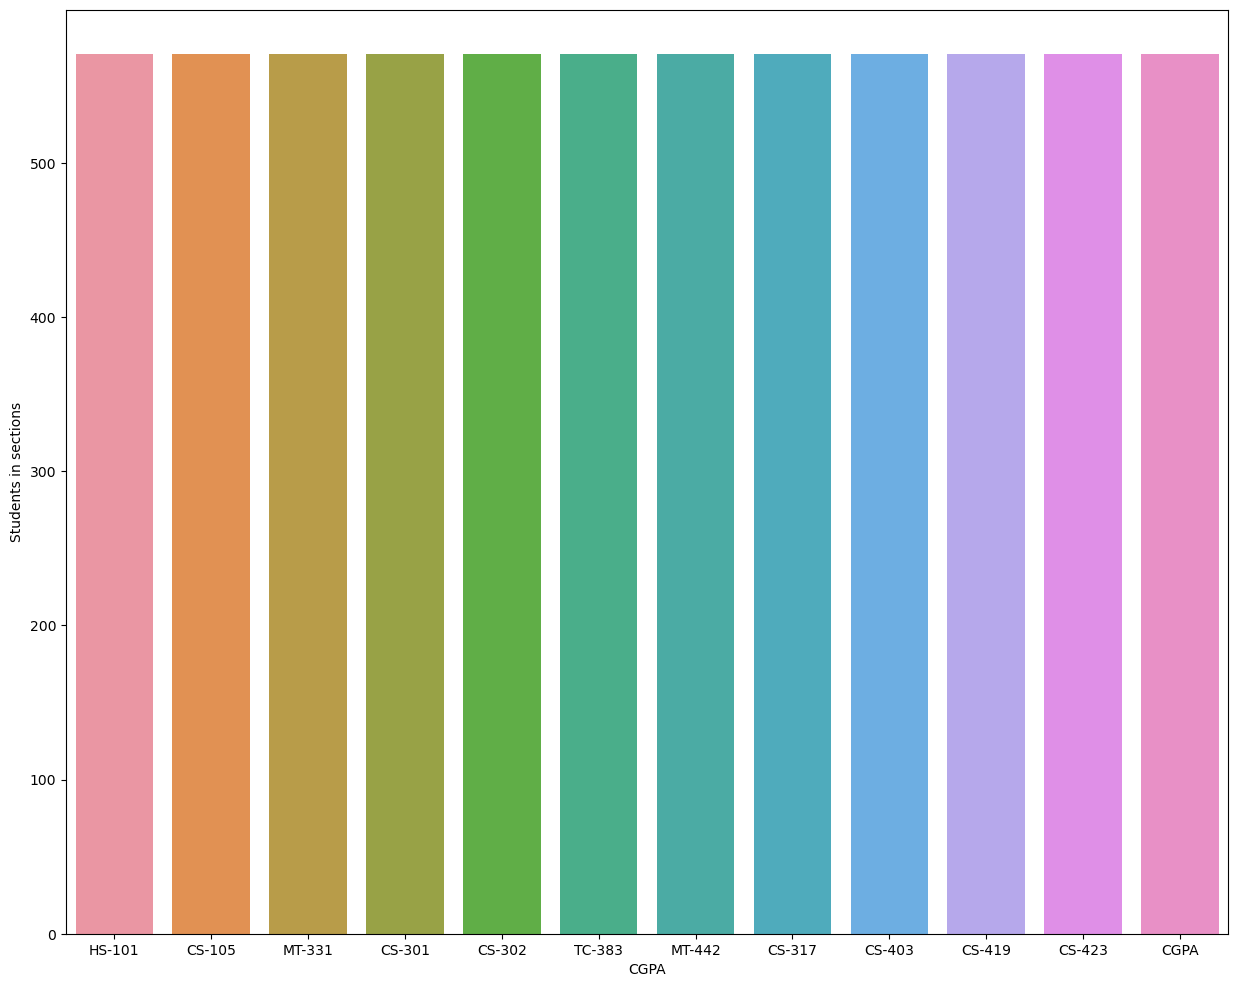

In [30]:
plt.figure(figsize=[15,12])
sns.countplot(data=grade_i)
plt.xlabel('CGPA')
plt.ylabel('Students in sections')
plt.show()

In [31]:
grade_i2=grade_i['CGPA'] >3

In [32]:
grade_i2

0      False
1      False
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569    False
570    False
Name: CGPA, Length: 571, dtype: bool

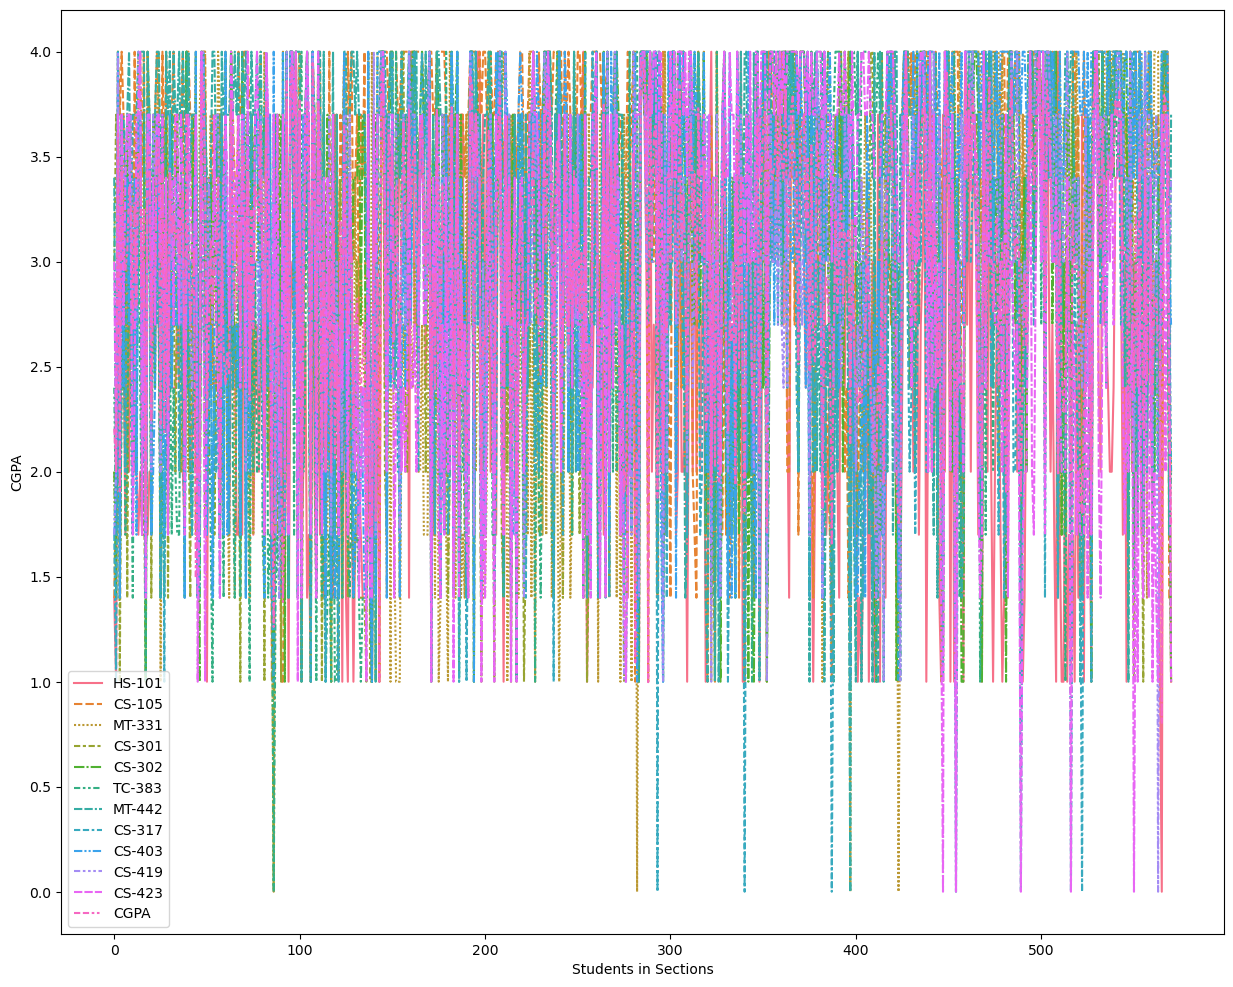

In [34]:
plt.figure(figsize=[15,12])
sns.lineplot(data=grade_i)
plt.xlabel('Students in Sections')
plt.ylabel('CGPA')
plt.show()

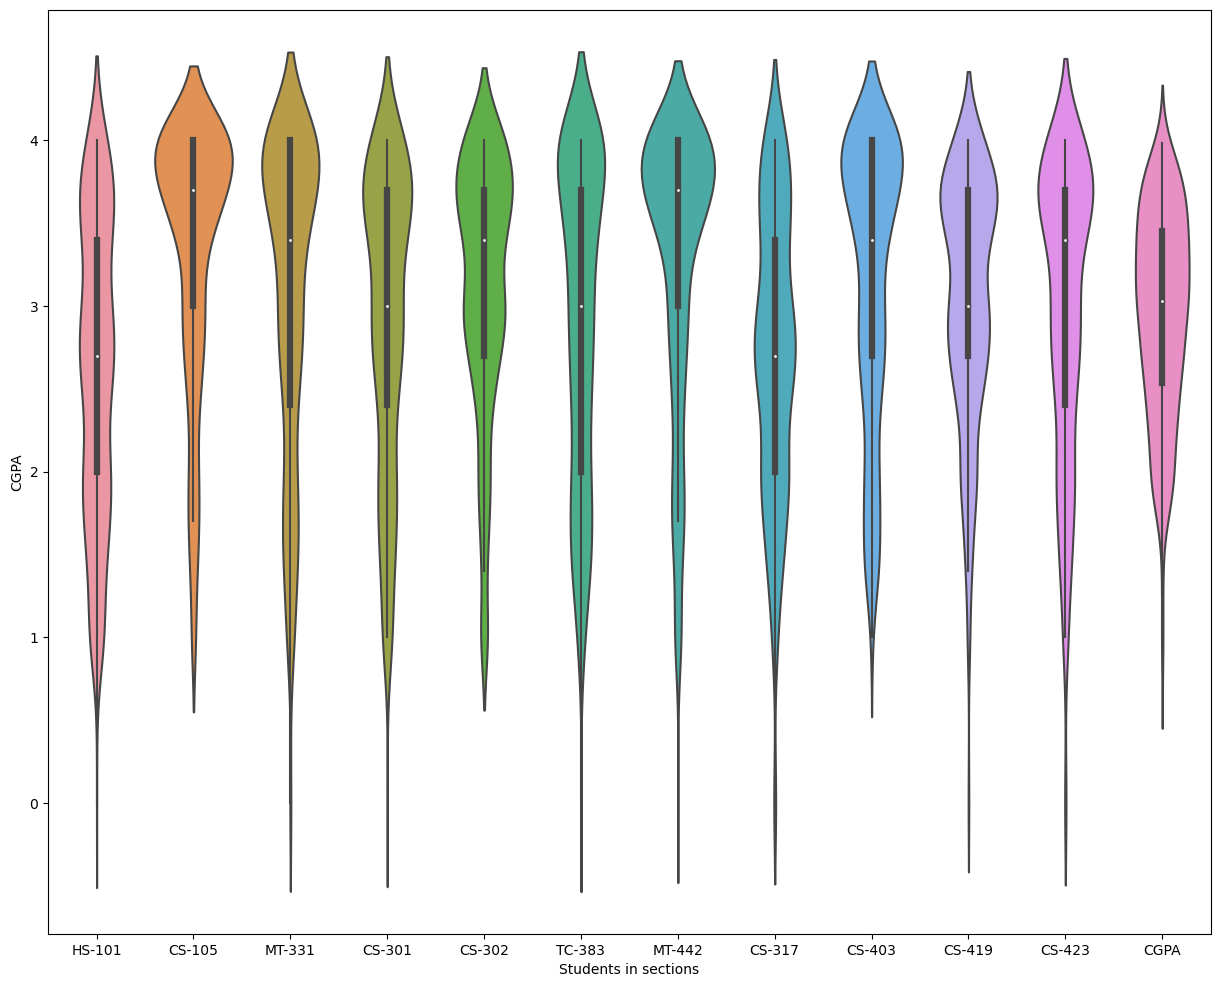

In [35]:
plt.figure(figsize=[15,12])
sns.violinplot(data=grade_i)
plt.xlabel('Students in sections')
plt.ylabel('CGPA')
plt.show()

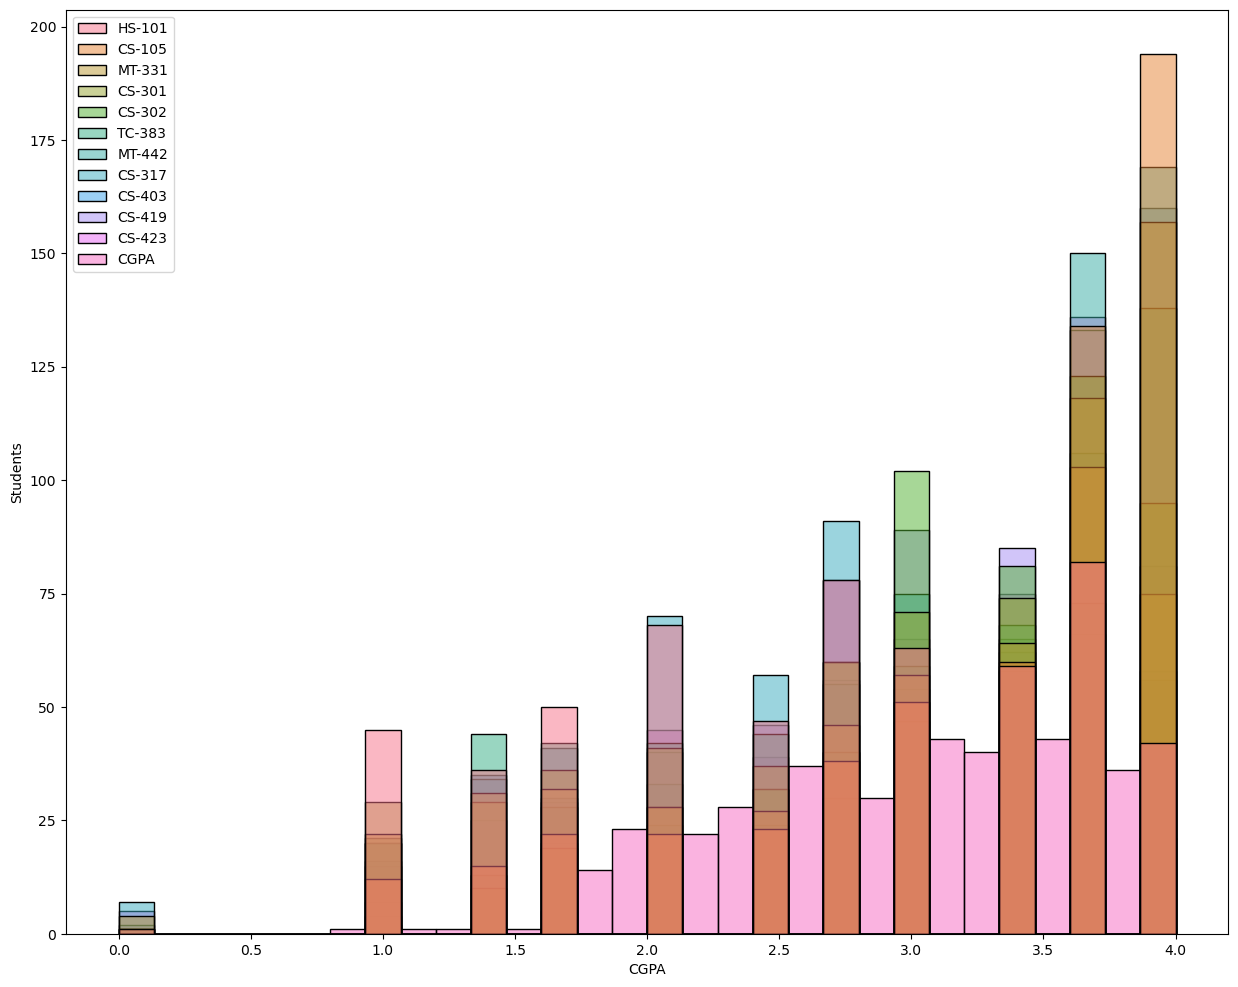

In [36]:
plt.figure(figsize=[15,12])
sns.histplot(data=grade_i) 
plt.xlabel('CGPA')
plt.ylabel('Students')
plt.show()

In [37]:
grade_i.describe()

HS-101      CS-105      MT-331      CS-301      CS-302      TC-383  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean     2.628371    3.329247    3.086690    2.915587    3.114886    2.943783   
std      0.908402    0.799826    0.948423    0.898724    0.780602    0.952288   
min      0.000000    1.000000    0.000000    0.000000    1.000000    0.000000   
25%      2.000000    3.000000    2.400000    2.400000    2.700000    2.000000   
50%      2.700000    3.700000    3.400000    3.000000    3.400000    3.000000   
75%      3.400000    4.000000    4.000000    3.700000    3.700000    3.700000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

           MT-442      CS-317      CS-403      CS-419      CS-423        CGPA  
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000  
mean     3.266900    2.707881    3.152890    3.047811    2.997023    2.954888  
std      0.855492    0.869497    0.852533    0.739991    0.880316    0.620552  
min      0.000000    0.000000    1.000000    0.000000    0.000000    0.800000  
25%      3.000000    2.000000    2.700000    2.700000    2.400000    2.538000  
50%      3.700000    2.700000    3.400000    3.000000    3.400000    3.029000  
75%      4.000000    3.400000    4.000000    3.700000    3.700000    3.451000  
max      4.000000    4.000000    4.000000    4.000000    4.000000    3.985000

<Axes: >

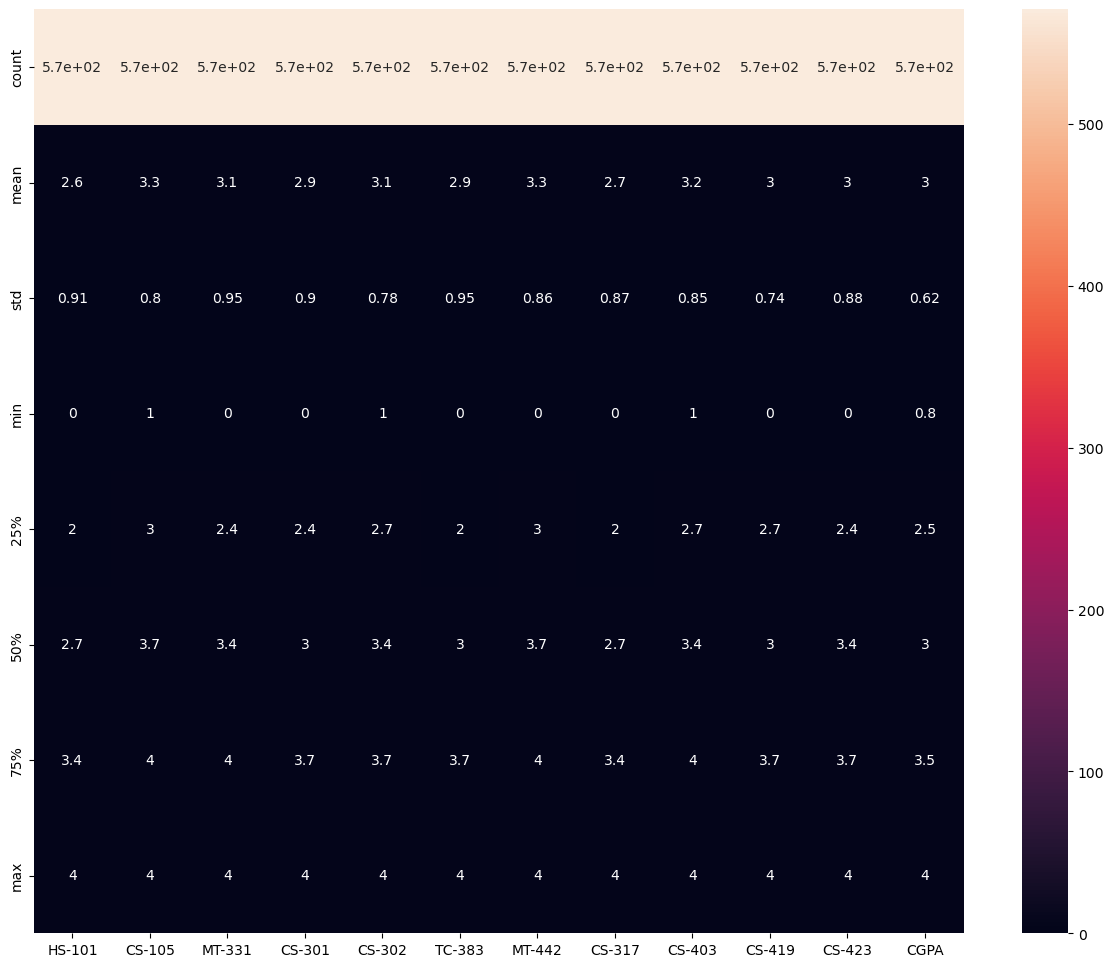

In [38]:
plt.figure(figsize=[15,12])
sns.heatmap(grade_i.describe(),annot=True)

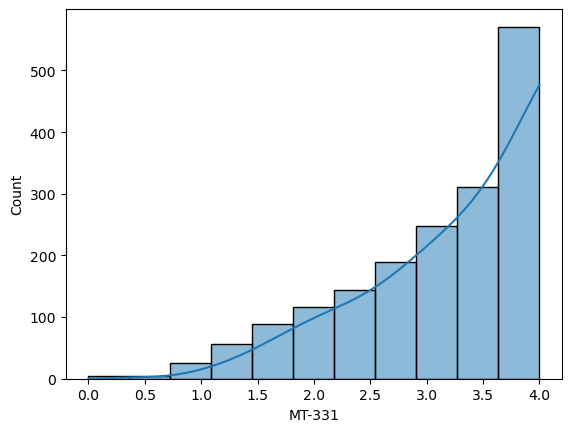

In [40]:
sns.histplot(grade_i['MT-331'], cumulative=True, kde=True)
plt.show()

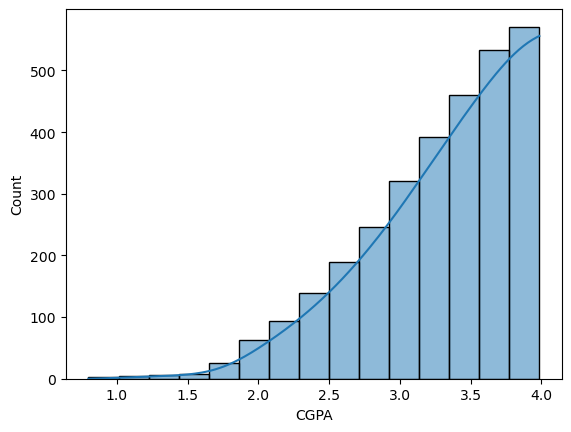

In [41]:
sns.histplot(grade_i['CGPA'],cumulative=True, kde=True)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8756\1206050530.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(grade_i['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

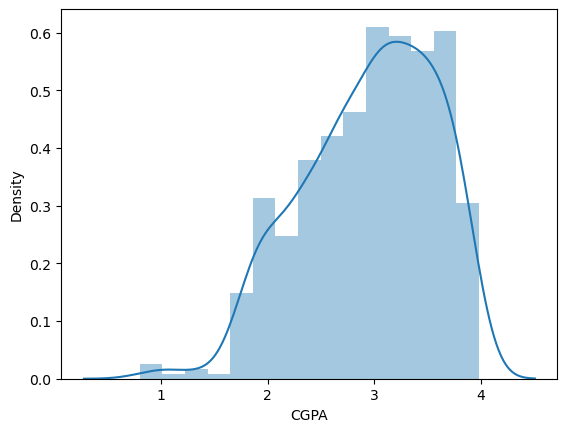

In [42]:
sns.distplot(grade_i['CGPA'])

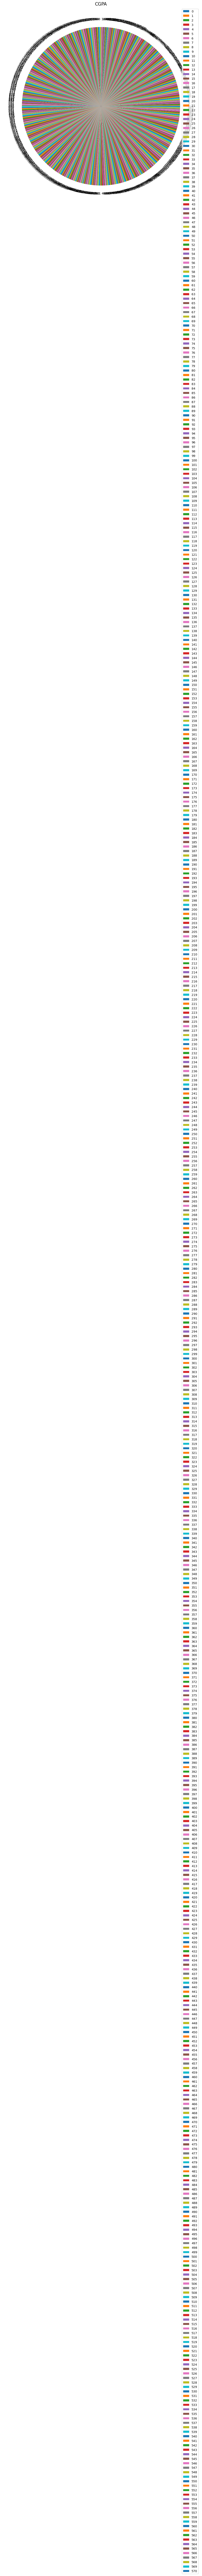

In [44]:
plt.figure(figsize=[12,12])
plt.pie(grade_i['CGPA'].values, labels = grade_i['CGPA'].index )
plt.title("CGPA", fontsize=15)
plt.legend()
plt.show()